# Conjunto de Mandelbrot

O Conjunto de Mandelbrot leva o nome do matemático Benoît B. Mandelbrot, considerado o pai da geometria fractal. Ele popularizou o conjunto nos anos 1980, mas sua origem remonta a estudos anteriores em dinâmica complexa, especialmente os trabalhos de matemáticos franceses como Pierre Fatou e Gaston Julia no início do século XX.

Esse conjunto forma um fractal bidimensional definido para o conjunto de pontos c tais que os termos da recorrência a seguir não divergem:

$z_0 = 0 \newline$
$z_{n+1} = (z_n)^2 + c$



In [2]:
from utils import ComplexNumber

def mandelbrot_recurrence(z_n: ComplexNumber, c: ComplexNumber) -> ComplexNumber:
    return z_n**2 + c

# Teste de divergência:

Para saber se um número faz parte do famoso conjunto, a ideia é observar o comportamento da sequência. Se ela permanece limitada, dizemos que c pertence ao conjunto. Se ela diverge (cresce sem limite), então c não pertence.

A fim de determinar esse comportamento, determinamos duas métricas:

* Número de Iterações ($N$):
$\newline \hspace{0.25cm}$- Se depois de $N$ passos a sequência não "explodiu", consideramos que ela **provavelmente não diverge**.

* Raio de Escape ($R$):
$\newline \hspace{0.25cm}$- Também chamado de *escape radius*, é o limite além do qual consideramos que a sequência está divergindo.
$\newline \hspace{0.25cm}$- Se o módulo $|z_n| > R$ em algum momento, consideramos que $c$ **não pertence ao conjunto**.
$\newline \hspace{0.25cm}$- Teoricamente, se $|z_n| = 2$, a sequência irá divergir. Por isso, $R = 2$ é suficiente.

In [3]:
import numpy as np

iterations = 800
escape_radius = 2
z_0 = ComplexNumber(0, 0)

def test_c(z_0, c, iterations=800, escape_radius=2):
    try:
        z = z_0
        for _ in range(iterations-1):
            z = mandelbrot_recurrence(z, c)
            if z.mod > escape_radius:
                return False
    except OverflowError:
        return False
    return True

# Encontrando números do conjunto:

In [4]:
mandelbrot_set = np.empty((0, 2))
width, height = (500, 500)

X = np.linspace(-2, 1, num=width)
Y = np.linspace(-1, 1, num=height)

points = []

for x in X:
    for y in Y:
        c = ComplexNumber(x, y)
        if test_c(z_0, c, iterations, escape_radius):
            points.append([x, y])

mandelbrot_set = np.array(points)

print(len(mandelbrot_set))

62675


# Plotando conjunto no Plano de Argand-Gauss:

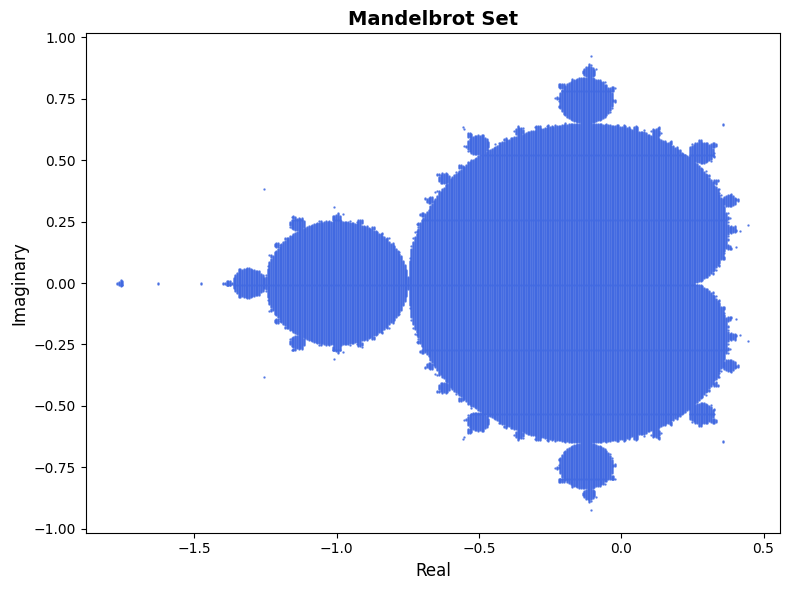

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(mandelbrot_set[:, 0], mandelbrot_set[:, 1], color='royalblue', s=0.5, alpha=0.8)
plt.xlabel('Real', fontsize=12)
plt.ylabel('Imaginary', fontsize=12)
plt.title('Mandelbrot Set', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Relação com o Caos

Ao restringir $c \in \mathbb{R}$ na equação $z_{n+1} = z_n^2 + c$, é possível transformá-la na equação logística:

$$
x_{n+1} = r x_n (1 - x_n)
$$

com a mudança $r = 1 - 2c$.

Essa conexão mostra que o **eixo real do Conjunto de Mandelbrot** reflete o **diagrama de bifurcação** da equação logística, revelando transições de **estabilidade para caos**.

Ou seja, o Mandelbrot é um **mapa visual da dinâmica caótica** de sistemas quadráticos.


In [6]:
x_values = mandelbrot_set[:, 0]
unique_x = np.unique(x_values)

r_array = np.array([(1-2*c) for c in unique_x])

print(len(r_array))

310


# Os valores de x do diagrama de bifurcação

Para cada valor de $r$ da equação logística, simulamos a evolução da sequência a partir de uma condição inicial $x_0$.

O código roda a iteração por várias vezes, mas descarta os primeiros valores para ignorar o comportamento inicial (transiente). Guardamos apenas os últimos valores, que representam o comportamento assintótico da dinâmica para aquele $r$: se a sequência converge, oscila ou entra em caos.

Em seguida, para cada valor de $r$, associamos os valores finais de $x$, formando pares $(r, x)$. Esses pares são os pontos que plotamos no **diagrama de bifurcação**:  
- **Eixo X**: valores de $r$  
- **Eixo Y**: valores de $x_n$ que a sequência visita no longo prazo

Assim, visualizamos os padrões de estabilidade, bifurcação e caos conforme $r$ varia. A instabilidade tende a aumentar com r se aproximando de 4, embora tenda a ter comportamento períodico em alguns momentos,

In [ ]:
def logistic_map(r, x0=0.5, iterations=1000, last=100):
    x = x0
    trajectory = []
    for i in range(iterations):
        x = r * x * (1 - x)
        if i >= iterations - last:
            trajectory.append(x)
    return trajectory

xs = []

for r in r_array:
    if r<= 4:
        result = logistic_map(r)
        for x in result:
            xs.append((r, x))
    else:
        print(r)

xs = np.array(xs)

4.543086172344689
4.531062124248497
4.519038076152304
4.507014028056112
4.254509018036073


# Plotando Digrama de Bifurcação:

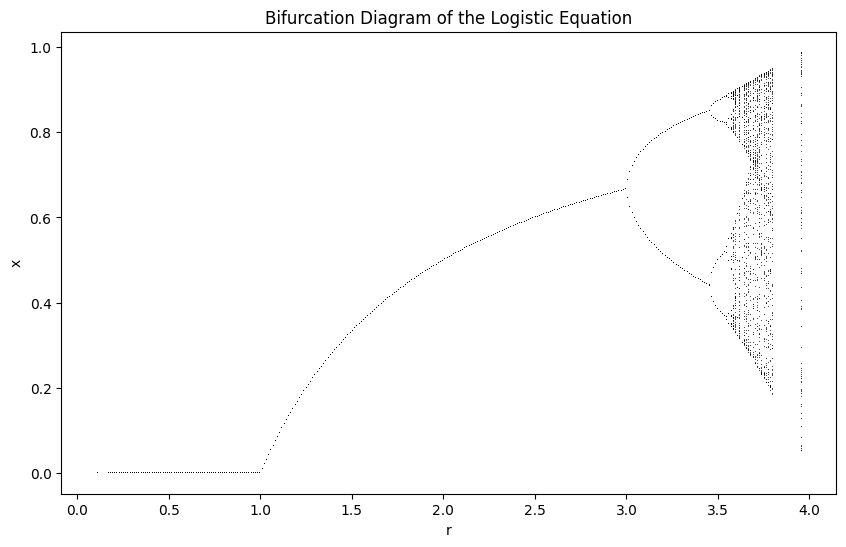

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(xs[:,0], xs[:,1], ',k', alpha=0.7)
plt.xlabel('r')
plt.ylabel('x')
plt.title('Bifurcation Diagram of the Logistic Equation')
plt.show()

# Mais relações entre Mandelbrot e o Caos!

Essa relação se apresenta de uma forma muito mais profunda. 

Para entender isso, é necessário perceber o que significa o Diagrama de Bifurcação: a quantidade de valores associados a um r (período) aumenta de acordo com que ele se aproxima de 4. Diante disso, observa-se que vão ocorrendo infinitas bifurcações $1 \rightarrow 2 \rightarrow 4 \rightarrow 8 \rightarrow \cdots \rightarrow \text{Caos!}$

De forma semelhante, isso aparece no Conjunto de Mandelbrot, no qual alguns valores apresentam período pequeno, já outros, tendem ao caos! Veja a visualização abaixo de acordo com os pontos c escolhidos.

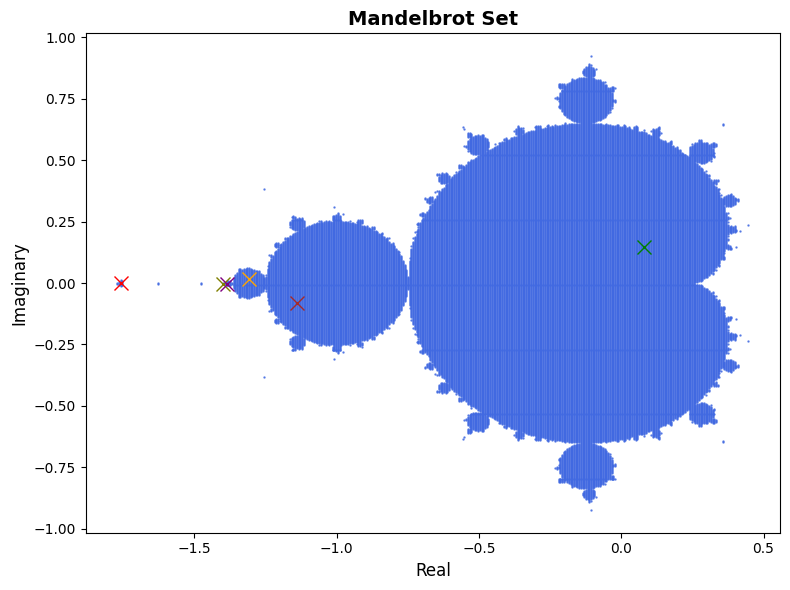

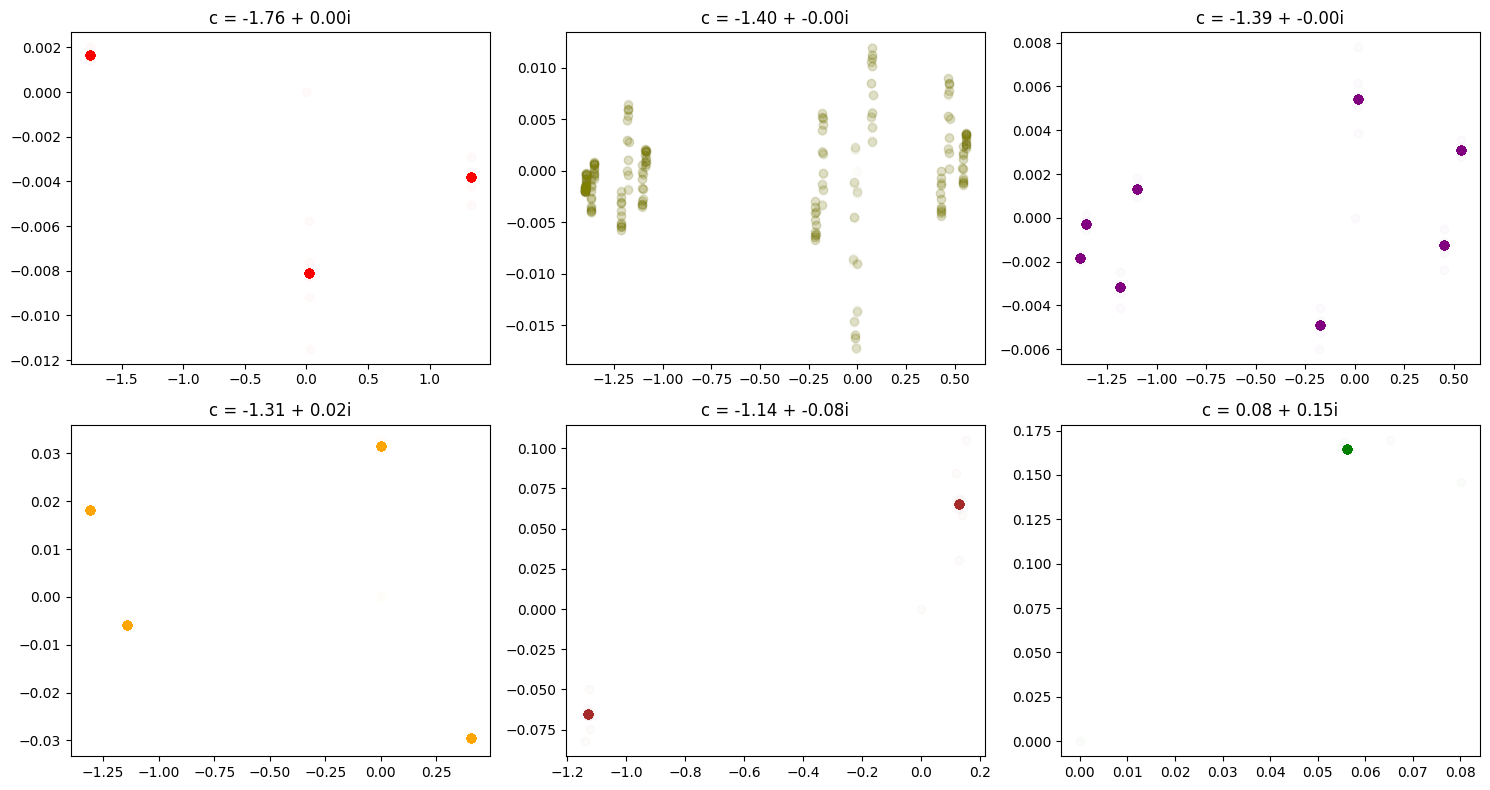

In [81]:
point_1, point_2, point_3 = mandelbrot_set[10, :], mandelbrot_set[24, :], mandelbrot_set[30, :]
point_4, point_5, point_6 = mandelbrot_set[300, :], mandelbrot_set[2000, :], mandelbrot_set[50000, :]
points_c = list([point_1, point_2, point_3, point_4, point_5, point_6])
colors = ['red', 'olive', 'purple', 'orange', 'brown', 'green']


plt.figure(figsize=(8, 6))

for i, point in enumerate(points_c):  
    plt.plot(*point, 'x', color=colors[i], markersize=10)
plt.scatter(mandelbrot_set[:, 0], mandelbrot_set[:, 1], color='royalblue', s=0.5, alpha=0.8)
plt.xlabel('Real', fontsize=12)
plt.ylabel('Imaginary', fontsize=12)
plt.title('Mandelbrot Set', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

iterations = 2000
for i, (cx, cy) in enumerate(points_c):
    z = z_0
    z_list = [[z[0], z[1]]]
    c = ComplexNumber(cx, cy)
    for j in range(iterations - 1):
        z = mandelbrot_recurrence(z, c)
        pair = [z[0], z[1]]
        z_list.append(pair)
    data = np.array(z_list)
    axes[i].scatter(data[:, 0], data[:, 1], alpha=0.02, color=colors[i])
    axes[i].set_title(f"c = {cx:.2f} + {cy:.2f}i")

plt.tight_layout()
plt.show()

# Resultado

Inicialmente, note que foi colocado um alpha bem baixo a fim de destacar a formação de clusters mais densos.

Após isso, pode-se perceber um padrão:

* No cardióide principal, apenas um único valor tende a permanecer estável.
* No círculo ao lado esquerdo (que, de fato, é um círculo), ocorre uma oscilação entre 2 valores.
* No terceiro, há a oscilação entre 4 valores.
* No quarto, há a oscilação entre 8 valores.
* No quinto, já há uma grande estabilidade.
* No sexto, volta a ter estabilidade e um período (3) aparente.

Isso te lembra alguma coisa?